### Percobaan 1

In [4]:
# Import library 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Langkah 1: Mengunduh dan memeriksa dataset MNIST

mnist = fetch_openml('mnist_784')

c:\Users\ULFI\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [5]:
# Langkah 2: Memeriksa keseimbangan data dalam dataset

label_counts = np.bincount(mnist.target.astype(int))
print("Jumlah data setiap label:", label_counts)

NameError: name 'mnist' is not defined

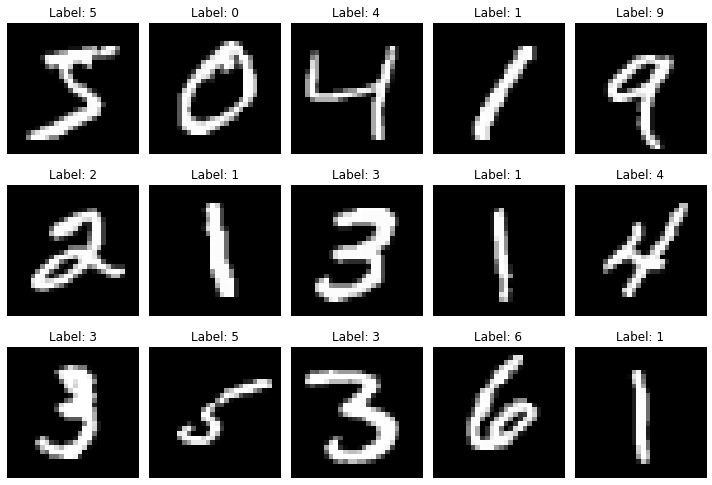

In [5]:
# Langkah 3: Menampilkan 15 gambar pertama beserta labelnya

fig, axes = plt.subplots(3, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()

In [7]:
# Langkah 4: Ekstraksi fitur
# Di sini, dapat memutuskan jenis ekstraksi fitur yang ingin Anda coba, misalnya PCA, histogram, atau menggunakan nilai pixel asli.
# Mari kita contohkan ekstraksi fitur sederhana dengan nilai pixel asli.
X = mnist.data
y = mnist.target

In [2]:
# Langkah 5: Membagi data menjadi data training dan data testing dengan rasio 70:30, 80:20, dan 90:10

# Rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

NameError: name 'train_test_split' is not defined

In [1]:
# Langkah 6: Klasifikasi dengan Naive Bayes dan SVM

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fungsi untuk melatih model dan melakukan evaluasi
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print(f"{model.__class__.__name__} (70:30)")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Klasifikasi dengan Naive Bayes
nb_model = MultinomialNB()
# Klasifikasi dengan SVM
svm_model = SVC()

# Evaluasi model Naive Bayes dan SVM untuk rasio 70:30
train_and_evaluate(X_train_70, X_test_70, y_train_70, y_test_70, nb_model)
train_and_evaluate(X_train_70, X_test_70, y_train_70, y_test_70, svm_model)

NameError: name 'X_train_70' is not defined

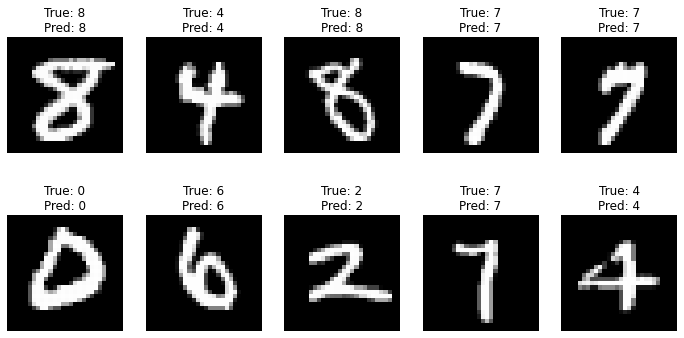

In [17]:
# Langkah 7: Menampilkan citra data testing berserta hasil pelabelannya
def show_images_with_predictions(model, X_test, y_test, num_images=10):
    predictions = model.predict(X_test[:num_images])
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test.iloc[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Menampilkan citra dengan hasil prediksi untuk model terbaik (70:30)
show_images_with_predictions(best_model, X_test_70, y_test_70)


KeyError: 0

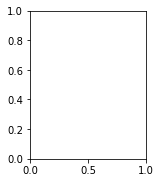

In [14]:
# Langkah 7: Menampilkan citra data testing berserta hasil pelabelannya
def show_images_with_predictions(X_test, y_test, y_pred, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

# Contoh untuk Naive Bayes
y_pred_nb = nb_model.predict(X_test_70)
show_images_with_predictions(X_test_70, y_test_70, y_pred_nb)

# Contoh untuk SVM
y_pred_svm = svm_model.predict(X_test_70)
show_images_with_predictions(X_test_70, y_test_70, y_pred_svm)